# Process Mining Module -  PDEng program Data Science - JADS 

This notebook is part of the Process Mining module of the JADS PDEng program on Data Science. It accompanies Lecture 1 on *Event Logs and Process Discovery*. 
The collection of notebooks is a *living document* and subject to change. 

# Lecture 1 - 'Event Logs and Process Discovery' (Python / PM4Py)

* **Responsible Lecturer**: Dr. Felix Mannhardt, [@fmannhardt](https://twitter.com/fmannhardt)
* **Last Update**: 21th April 2021

## Setup

<img src="https://pm4py.fit.fraunhofer.de/static/assets/images/pm4py-site-logo-padded.png" alt="PM4Py" style="width: 200px;"/>

For this lecture, we are using the [PM4Py library](https://pm4py.fit.fraunhofer.de/) in combination with several standard Python data science libraries:

* pandas
* matplotlib

In [2]:
## Perform the commented out commands to install the dependencies
# %pip install pandas
# %pip install matplotlib
# %pip install pm4py

In [3]:
import pandas
import matplotlib
import pm4py
import plotnine

## Event Logs

This part introduces event logs and their unique properties that provide the basis for any Process Mining method. We use the same event logs as provided by `bupaR`. However, we need to load them from the CSV files in the `data` directory of this repository. In this lecture we are going to make use of the following datasets:

* Patients, a synthetically generated example event log in a hospital setting.
* Sepsis, a real-life event log taken from a Dutch hospital. The event log is publicly available here: https://doi.org/10.4121/uuid:915d2bfb-7e84-49ad-a286-dc35f063a460 and has been used in many Process Mining related publications.

### Import Patients Data

In [4]:
patients = pandas.read_csv("../data/patients.csv", sep=';')
num_rows = len(patients)
print("Number of rows: {}".format(num_rows))

Number of rows: 5442


### Import Sepsis Data

In [5]:
sepsis = pandas.read_csv("../data/sepsis.csv", sep=';')
num_rows = len(sepsis)
print("Number of rows: {}".format(num_rows))

Number of rows: 15214


### Exploring Event Data

Let us first explore the event data without any prior knowledge about event log structure or properties. We convert the `patients` event log below to a standard `tibble` (https://tibble.tidyverse.org/) and inspect the first rows.

In [6]:
patients.head()

,handling,patient,employee,handling_id,registration_type,time,.order
0,Registration,1,r1,1,start,2017-01-02T11:41:53Z,1
1,Registration,2,r1,2,start,2017-01-02T11:41:53Z,2
2,Registration,3,r1,3,start,2017-01-04T01:34:05Z,3
3,Registration,4,r1,4,start,2017-01-04T01:34:04Z,4
4,Registration,5,r1,5,start,2017-01-04T16:07:47Z,5


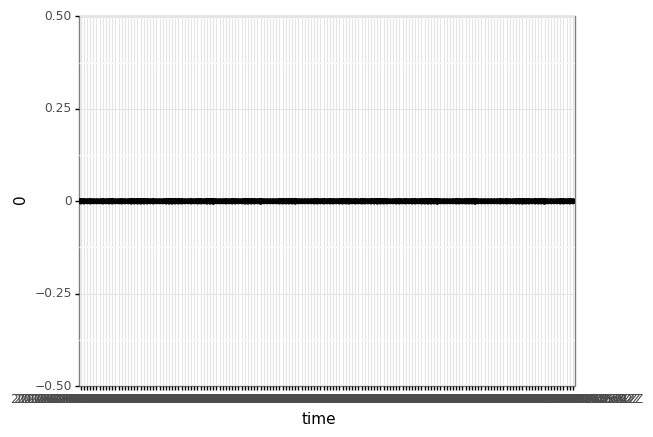

<ggplot: (161334703141)>

In [7]:
from plotnine import ggplot, geom_point, aes, theme_bw

patients_sample = patients[patients['time'] < '2017-01-31']
(ggplot(patients_sample, aes('time', 0))
 + geom_point() 
 + theme_bw())

In [17]:
patients.drop_duplicates(subset='handling')[["handling"]]

,handling
0,Registration
500,Triage and Assessment
1000,Blood test
1237,MRI SCAN
1473,X-Ray
1734,Discuss Results
2229,Check-out


In [16]:
patients.drop_duplicates(subset='patient')[["patient"]].head()

,patient
0,1
1,2
2,3
3,4
4,5


In [15]:
patients.groupby(['patient'])["patient"].agg(['count']).head()

,count
patient,
1,12
2,10
3,12
4,12
5,10


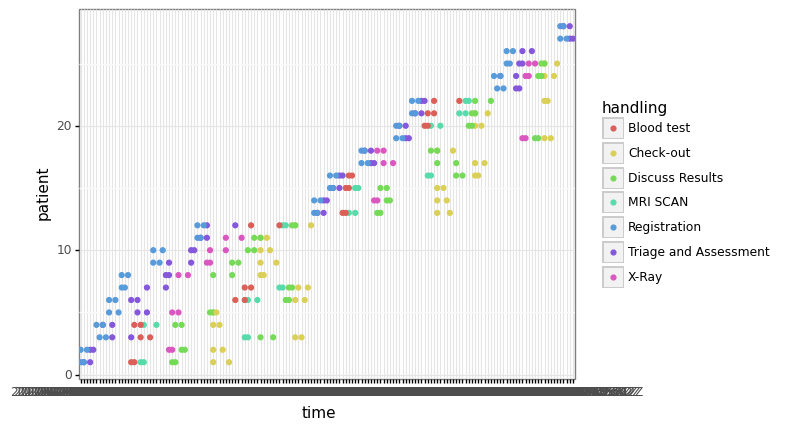

<ggplot: (161337519508)>

In [19]:
patients_sample = patients[patients['time'] < '2017-01-31']
(ggplot(patients_sample, aes('time', 'patient', color = 'handling'))
 + geom_point() 
 + theme_bw())

In [21]:
patients.sort_values(['patient', 'time']).head()

,handling,patient,employee,handling_id,registration_type,time,.order
0,Registration,1,r1,1,start,2017-01-02T11:41:53Z,1
500,Triage and Assessment,1,r2,501,start,2017-01-02T12:40:20Z,501
2721,Registration,1,r1,1,complete,2017-01-02T12:40:20Z,2722
3221,Triage and Assessment,1,r2,501,complete,2017-01-02T22:32:25Z,3222
1000,Blood test,1,r3,1001,start,2017-01-05T08:59:04Z,1001


### Further resources

* [XES Standard](http://xes-standard.org/)
* [Importing CSV event logs](https://pm4py.fit.fraunhofer.de/documentation#item-import-csv)
* [Importing XES event logs](https://pm4py.fit.fraunhofer.de/documentation#item-impoort-xes)

#### Reflection Questions

* What could be the reason a column `.order` is included in this dataset?
* How could the column `employee` be used?
* What is the use of the column `handling_id` and in which situation is it required?

## Basic Process Visualization